In [4]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 292.8 kB/s eta 0:00:000:00:01m eta 0:00:02
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 254.5 kB/s eta 0:00:00 kB/s eta 0:00:01:02
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]ow]
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl

In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
files = glob.glob("../results/*.csv")

dfs = [pd.read_csv(file) for file in files]
df = pd.concat(dfs, ignore_index=True)

summary = df.groupby(["allocator_name", "benchmark_name", "amount"]).agg(
    mean_time=("total_time", "mean"),
    std_time=("total_time", "std"),
    runs=("total_time", "count")
).reset_index()

summary

,allocator_name,benchmark_name,amount,mean_time,std_time,runs
0,dmalloc,basic,1000,0.000025,0.000016,2
1,dmalloc,basic,2000,0.000052,0.000033,2
2,dmalloc,basic,3000,0.000093,0.000022,2
3,dmalloc,basic,4000,0.000140,0.000006,2
4,dmalloc,basic,5000,0.000175,0.000010,2
5,dmalloc,basic,6000,0.000211,0.000030,2
6,dmalloc,basic,7000,0.000237,0.000023,2
7,dmalloc,basic,8000,0.000278,0.000034,2
8,dmalloc,basic,9000,0.000307,0.000030,2
9,dmalloc,basic,10000,0.000340,0.000034,2


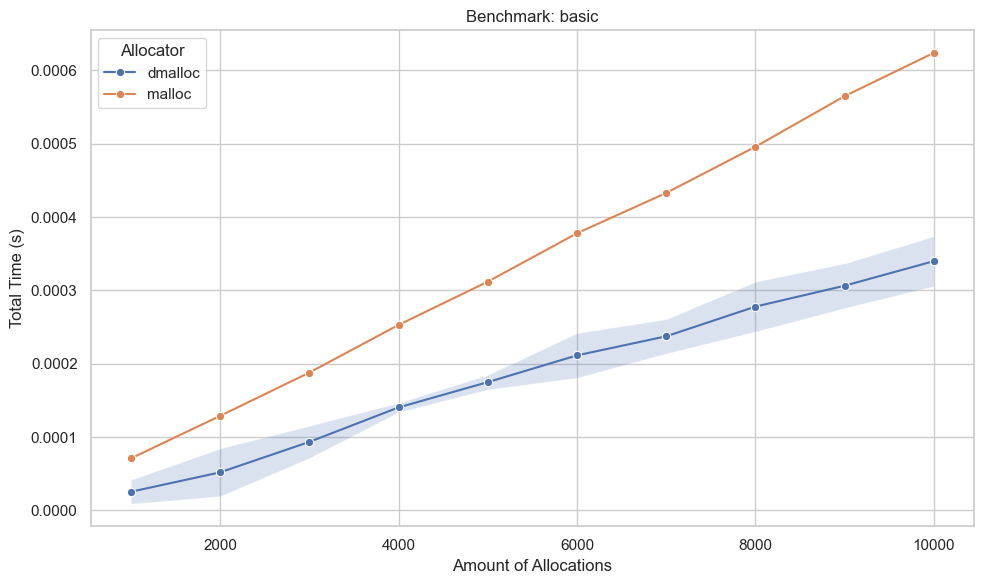

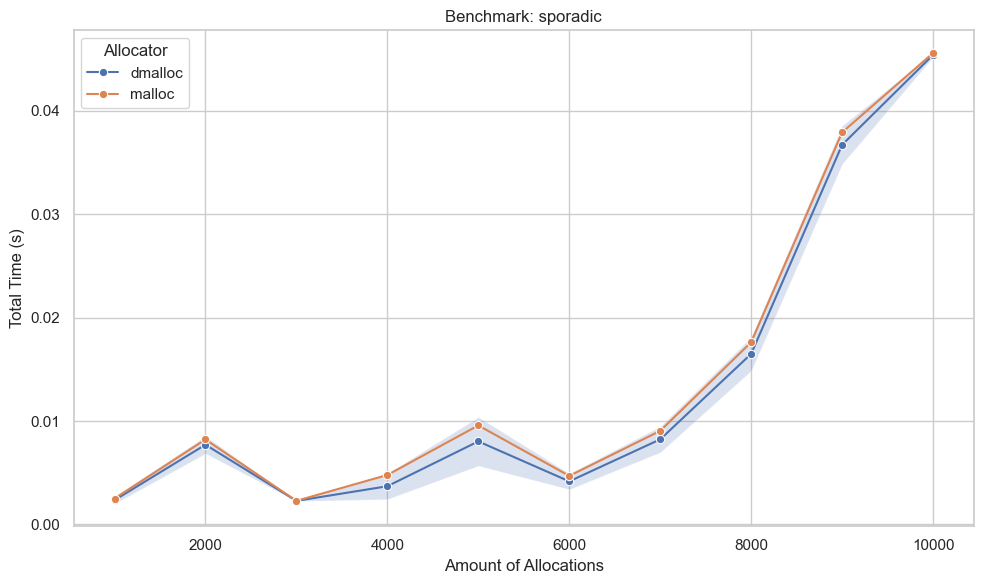

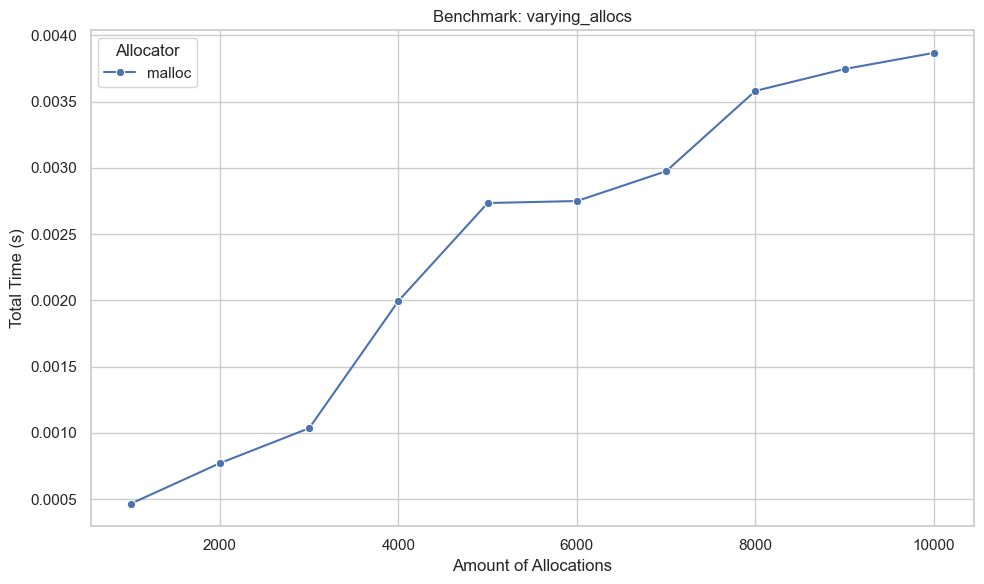

In [10]:
sns.set_theme(style="whitegrid")

for benchmark in summary["benchmark_name"].unique():
    subset = summary[summary["benchmark_name"] == benchmark]

    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(
        data=subset,
        x="amount",
        y="mean_time",
        hue="allocator_name",
        marker="o"
    )

    # Add error bands (± std_time)
    for allocator in subset["allocator_name"].unique():
        alloc_data = subset[subset["allocator_name"] == allocator]
        plt.fill_between(
            alloc_data["amount"],
            alloc_data["mean_time"] - alloc_data["std_time"],
            alloc_data["mean_time"] + alloc_data["std_time"],
            alpha=0.2
        )

    plt.title(f"Benchmark: {benchmark}")
    plt.xlabel("Amount of Allocations")
    plt.ylabel("Total Time (s)")
    plt.legend(title="Allocator")
    plt.tight_layout()